# Time series analysis - Example code 18: Revisiting the Lydia-Pinkham data set

**Lund University, Lund, Sweden**

See also code 11 as well as examples 4.22 and 7.11.

**Reference:**  
"An Introduction to Time Series Modeling", 4th ed, by Andreas Jakobsson  
Studentlitteratur, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../TimeSeriesAnalysis-main/TimeSeriesAnalysis-main')

from tsa_lth.multivariate import corrM, pacfM, lsVAR

## Load the data

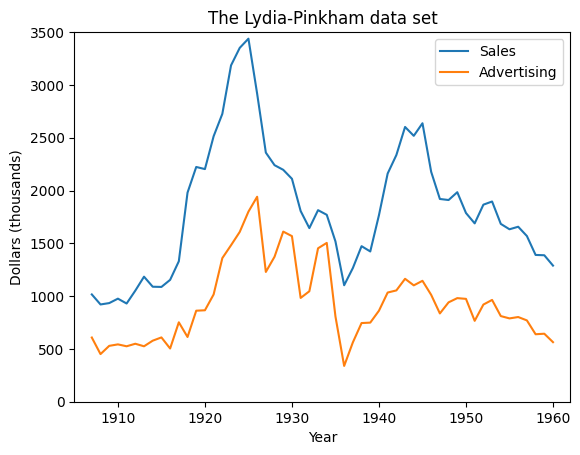

In [2]:
# Load the data.
data = pd.read_csv('../data/lydia_pinkham.csv')
y1 = data['Advertising'].values
y2 = data['Sales'].values
time = np.arange(1907, 1961)
noLags = 10
N = len(time)

plt.figure()
plt.plot(time, y2, label='Sales')
plt.plot(time, y1, label='Advertising')
plt.xlabel('Year')
plt.ylabel('Dollars (thousands)')
plt.axis([1905, 1962, 0, 3500])
plt.legend()
plt.title('The Lydia-Pinkham data set')
plt.show()

## Estimate the multivariate ACF and PACF

In [3]:
# Using code 11, we first differentiate the log of the data.
y1 = np.diff(np.log(y1))
y2 = np.diff(np.log(y2))

Y = np.column_stack([y1, y2])                  # Construct data matrix.
[Ry, rhoY] = corrM(Y.T, noLags)                # Estimate the ACF and PACF.
S, _ = pacfM(Y.T, noLags)

# This is rho(1), rho(2), ...
Ra = np.hstack([rhoY[1], rhoY[2], rhoY[3], rhoY[4], rhoY[5], rhoY[6], rhoY[7], rhoY[8]])
print('Ra =')
print(Ra)

# This is theta(1), theta(2), ...
Sa = np.hstack([S[0], S[1], S[2], S[3], S[4], S[5], S[6], S[7]])
print('\nSa =')
print(Sa)

Ra =
[[-0.00844699  0.20042272 -0.28565179 -0.14111481 -0.09509044  0.03636977
   0.2506769   0.30454393  0.12444476  0.14438543 -0.25625608 -0.17094352
  -0.08712305  0.0345721   0.1009377   0.09174458]
 [ 0.24372241  0.35640137 -0.18653458  0.01926723  0.03850433  0.14988603
   0.14804884  0.13094932 -0.14033487  0.06372906 -0.21508691 -0.11170378
  -0.16941899 -0.09597445  0.02366262 -0.07360661]]

Sa =
[[-0.00844699  0.24372241 -0.40497788 -0.24160787 -0.13061105  0.07699944
   0.01832148  0.20036984 -0.01964294  0.13971546 -0.16919797 -0.12058225
  -0.00857253  0.21235297 -0.05632517  0.06120355]
 [ 0.20042272  0.35640137 -0.30283761 -0.12266127  0.10328597  0.21241282
  -0.02821146 -0.07326949 -0.24771816  0.05061515 -0.24198904 -0.09107608
  -0.2128121  -0.01162258 -0.1449327  -0.15785829]]


## Which coefficients are significant?

In [4]:
print(f'The estimated variance of the ACF and PACF are {1/N:.2f}.')
print(np.abs(Ra) > 2 / np.sqrt(N))
print(np.abs(Sa) > 2 / np.sqrt(N))

print('\nThe PACF suggests a VAR(2) model might be appropriate.')

The estimated variance of the ACF and PACF are 0.02.
[[False False  True False False False False  True False False False False
  False False False False]
 [False  True False False False False False False False False False False
  False False False False]]
[[False False  True False False False False False False False False False
  False False False False]
 [False  True  True False False False False False False False False False
  False False False False]]

The PACF suggests a VAR(2) model might be appropriate.


## Estimate the parameters for the VAR(2) model

In [5]:
# The lsVAR function returns the estimated parameters, the estimated
# variance of the residual, and the residual.
thEst, sigEst, resEst = lsVAR(Y.T, 2)

print('The estimated VAR(2) model is:')
print(thEst)

print('\nThe estimated covariance of the noise residual is:')
print(sigEst)

The estimated VAR(2) model is:
[[ 0.31355562 -0.98301498  0.4119769   0.01103207]
 [ 0.02475688 -0.45120357  0.18453866 -0.08998211]]

The estimated covariance of the noise residual is:
[[0.04333592 0.01291098]
 [0.01291098 0.01223113]]
